In [1]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
from ast import literal_eval 
from itertools import chain

In [33]:
df = pd.read_csv('bluehive_job_table.txt', header=None)

In [34]:
# df = df[df[27] == 'standard']
df.columns = ['job_db_inx', 'mod_time', 'deleted', 'account', 'array_task_str', 'array_max_tasks',
          'array_task_pending', 'cpus_req', 'derived_ec', 'derived_es', 'exit_code','job_name',
          'id_assoc', 'id_array_job', 'id_array_task', 'id_block', 'id_job', 'id_qos', 'id_resv',
          'id_wckey', 'id_user', 'id_group', 'kill_requid', 'mem_req', 'nodelist', 'nodes_alloc',
          'node_inx', 'partition', 'priority', 'state', 'timelimit', 'time_submit', 'time_eligible',
          'time_start', 'time_end', 'time_suspended', 'gres_req', 'gres_alloc', 'gres_used', 'wckey',
          'track_steps', 'tres_alloc', 'tres_req']

df = df[df['nodelist'] != "None assigned"]
df.head()

,job_db_inx,mod_time,deleted,account,array_task_str,array_max_tasks,array_task_pending,cpus_req,derived_ec,derived_es,...,time_start,time_end,time_suspended,gres_req,gres_alloc,gres_used,wckey,track_steps,tres_alloc,tres_req
0,1,1495561699,0,circ_staff,\N,0,0,1,0,\N,...,1495561399,1495561699,0,NaN,NaN,NaN,*,0,"1=1,2=2048,4=1","1=1,2=2048,4=1"
1,2,1495561466,0,circ_staff,\N,0,0,2,32512,\N,...,1495561462,1495561463,0,NaN,NaN,NaN,*,0,"1=2,2=4096,4=1","1=2,2=4096,4=1"
2,3,1495561466,0,circ_staff,\N,0,0,1,0,\N,...,1495561462,1495561463,0,mic:1,6515053:1,NaN,*,0,"1=1,2=2048,4=1,6=1","1=1,2=2048,4=1,6=1"
3,6,1495562236,0,circ_staff,\N,0,0,24,0,\N,...,1495561462,1495562236,0,NaN,NaN,NaN,*,0,"1=24,2=20480,4=1","1=24,2=20480,4=1"
4,7,1495561604,0,circ_staff,\N,0,0,1,0,\N,...,1495561462,1495561604,0,NaN,NaN,NaN,*,0,"1=1,2=4096,4=1","1=1,2=4096,4=1"


In [36]:
len(df)

7596814

In [39]:
df['time_wait'] = df['time_start'] - df['time_eligible']

In [40]:
df['time_submit_datetime'] = df['time_submit'].apply(datetime.datetime.fromtimestamp)
df['time_start_date_time'] = df['time_start'].apply(datetime.datetime.fromtimestamp)
df['time_end_date_time'] = df['time_end'].apply(datetime.datetime.fromtimestamp)
df['time_eligible_date_time'] = df['time_eligible'].apply(datetime.datetime.fromtimestamp)
# df['time_wait_date_time'] = df['time_end'].apply(datetime.datetime.fromtimestamp)

In [41]:
df['time_wait_date_time'] = df['time_start_date_time'] - df['time_eligible_date_time']

In [42]:
df['time_end_date_time'].describe()

count                 7596814
unique                3960695
top       1969-12-31 19:00:00
freq                     1281
first     1969-12-31 19:00:00
last      2019-03-21 13:04:57
Name: time_end_date_time, dtype: object

In [43]:
df = df[df["time_end_date_time"] != '1969-12-31 19:00:00']

In [44]:
df['time_end_date_time'].describe()

count                 7595533
unique                3960694
top       2017-12-07 17:17:51
freq                      483
first     2017-05-23 13:44:23
last      2019-03-21 13:04:57
Name: time_end_date_time, dtype: object

In [45]:
len(df)

7595533

In [47]:
df1 = df[df['time_start_date_time'] >= '2018-07-12 00:00:00']
df2 = df1[df1['time_end_date_time'] <= '2018-12-13 00:00:00']
df2 = df2.reset_index()
df = df2

In [48]:
df.head()

,index,job_db_inx,mod_time,deleted,account,array_task_str,array_max_tasks,array_task_pending,cpus_req,derived_ec,...,wckey,track_steps,tres_alloc,tres_req,time_wait,time_submit_datetime,time_start_date_time,time_end_date_time,time_eligible_date_time,time_wait_date_time
0,4470276,21601684,1538688513,0,tweber2_lab,\N,0,0,16,0,...,*,0,"1=16,2=32768,4=1","1=16,2=32768,4=1",14330563,2018-04-20 19:43:27,2018-10-03 16:28:11,2018-10-04 17:28:33,2018-04-20 19:45:28,165 days 20:42:43
1,5166089,24256577,1531380624,0,mmccall2_lab,\N,0,0,24,0,...,*,0,"1=24,2=49152,4=1","1=24,2=49152,4=1",743005,2018-07-03 12:00:10,2018-07-12 02:23:38,2018-07-12 03:30:24,2018-07-03 12:00:13,8 days 14:23:25
2,5166090,24256578,1531394110,0,mmccall2_lab,\N,0,0,24,0,...,*,0,"1=24,2=49152,4=1","1=24,2=49152,4=1",756513,2018-07-03 12:00:10,2018-07-12 06:08:46,2018-07-12 07:15:10,2018-07-03 12:00:13,8 days 18:08:33
3,5166091,24256579,1531408622,0,mmccall2_lab,\N,0,0,24,0,...,*,0,"1=24,2=49152,4=1","1=24,2=49152,4=1",767643,2018-07-03 12:00:10,2018-07-12 09:14:16,2018-07-12 11:17:02,2018-07-03 12:00:13,8 days 21:14:03
4,5166092,24256580,1531421275,0,mmccall2_lab,\N,0,0,24,0,...,*,0,"1=24,2=49152,4=1","1=24,2=49152,4=1",783654,2018-07-03 12:00:10,2018-07-12 13:41:07,2018-07-12 14:47:55,2018-07-03 12:00:13,9 days 01:40:54


In [49]:
memory_req = []
s = ""
for i in df['tres_req']:
    try:
        s = re.findall('[,]*2=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        memory_req.append(int(s))
    except:
        memory_req.append(np.nan)

memory_alloc = []
s = ""
for i in df['tres_alloc']:
    try:
        s = re.findall('[,]*2=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        memory_alloc.append(int(s))
    except:
        memory_alloc.append(np.nan)
        
df['requested_memory_tres'] = memory_req
df['allocated_memory_tres'] = memory_alloc


cpu_req = []
s = ""
for i in df['tres_req']:
    try:
        s = re.findall('[,]*1=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        cpu_req.append(int(s))
    except:
        cpu_req.append(np.nan)

cpu_alloc = []
s = ""
for i in df['tres_alloc']:
    try:
        s = re.findall('[,]*1=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        cpu_alloc.append(int(s))
    except:
        cpu_alloc.append(np.nan)
        
df['requested_cpu_tres'] = cpu_req
df['allocated_cpu_tres'] = cpu_alloc


gres_req = []
s = ""
for i in df['tres_req']:
    try:
        s = re.findall('[,]*5=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        gres_req.append(int(s))
    except:
        gres_req.append(np.nan)

gres_alloc = []
s = ""
for i in df['tres_alloc']:
    try:
        s = re.findall('[,]*5=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        gres_alloc.append(int(s))
    except:
        gres_alloc.append(np.nan)
        
df['requested_gres_tres'] = gres_req
df['allocated_gres_tres'] = gres_alloc


node_req = []
s = ""
for i in df['tres_req']:
    try:
        s = re.findall('[,]*4=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        node_req.append(int(s))
    except:
        node_req.append(np.nan)

node_alloc = []
s = ""
for i in df['tres_alloc']:
    try:
        s = re.findall('[,]*4=+[\d]+[,]*', i)
        s = s[0].strip(",")
        s = s[2:]
        node_alloc.append(int(s))
    except:
        node_alloc.append(np.nan)
        
df['requested_node_tres'] = node_req
df['allocated_node_tres'] = node_alloc

In [50]:
df = df.drop(["tres_alloc"], axis=1)
df = df.drop(["tres_req"], axis=1)
df = df.drop(["gres_alloc"], axis=1)
df = df.drop(["gres_req"], axis=1)
df = df.drop(["allocated_gres_tres"], axis=1)
df = df.drop(["requested_gres_tres"], axis=1)
df.head()

,index,job_db_inx,mod_time,deleted,account,array_task_str,array_max_tasks,array_task_pending,cpus_req,derived_ec,...,time_start_date_time,time_end_date_time,time_eligible_date_time,time_wait_date_time,requested_memory_tres,allocated_memory_tres,requested_cpu_tres,allocated_cpu_tres,requested_node_tres,allocated_node_tres
0,4470276,21601684,1538688513,0,tweber2_lab,\N,0,0,16,0,...,2018-10-03 16:28:11,2018-10-04 17:28:33,2018-04-20 19:45:28,165 days 20:42:43,32768.0,32768.0,16.0,16.0,1.0,1.0
1,5166089,24256577,1531380624,0,mmccall2_lab,\N,0,0,24,0,...,2018-07-12 02:23:38,2018-07-12 03:30:24,2018-07-03 12:00:13,8 days 14:23:25,49152.0,49152.0,24.0,24.0,1.0,1.0
2,5166090,24256578,1531394110,0,mmccall2_lab,\N,0,0,24,0,...,2018-07-12 06:08:46,2018-07-12 07:15:10,2018-07-03 12:00:13,8 days 18:08:33,49152.0,49152.0,24.0,24.0,1.0,1.0
3,5166091,24256579,1531408622,0,mmccall2_lab,\N,0,0,24,0,...,2018-07-12 09:14:16,2018-07-12 11:17:02,2018-07-03 12:00:13,8 days 21:14:03,49152.0,49152.0,24.0,24.0,1.0,1.0
4,5166092,24256580,1531421275,0,mmccall2_lab,\N,0,0,24,0,...,2018-07-12 13:41:07,2018-07-12 14:47:55,2018-07-03 12:00:13,9 days 01:40:54,49152.0,49152.0,24.0,24.0,1.0,1.0


In [55]:
import re
def expand_nodes(s):
    nodes = []
    m = re.match(r'([a-zA-Z]+)(.*)',s)
    (prefix,numbers) = m.group(1,2)
    if(numbers[0]=='['):
        ranges=numbers[1:-1].split(',')
    else:
        ranges=[numbers]    
    for r in ranges:
        m=re.match(r'(\d+)-(\d+)',r)
        if m:
            (first,last)=m.group(1,2)
        else:
            first=r
            last=r            
        nd=len(first)            
        for n in range(int(first),int(last)+1):           
            nodes.append('%%s%%%d.%dd'%(nd,nd)%(prefix,n))
    return nodes

In [56]:
node_list = list(df['nodelist'])

for i in range(len(node_list)):
    if (',' in node_list[i]) and ('[' not in node_list[i]):
        splited = node_list[i].split(',')
        splited = [expand_nodes(j) for j in splited]
        splited = list(chain.from_iterable(splited))
        node_list[i] = list(set(splited))
    else:
        node_list[i] = list(set(expand_nodes(node_list[i])))
    
df['nodelist'] = node_list

In [57]:
df['nodelist'].iloc[0:4]

0    [bhd0017]
1    [bhc0108]
2    [bhc0107]
3    [bhc0187]
Name: nodelist, dtype: object

In [59]:
x = []
start = datetime.datetime.strptime('2018-07-12 00:00:00', '%Y-%m-%d %H:%M:%S')
end = datetime.datetime.strptime('2018-12-12 00:00:00', '%Y-%m-%d %H:%M:%S')
time = start

while time != end:
    time = time + datetime.timedelta(hours=1)
    x.append(time)
df_utilization = pd.DataFrame()
df_utilization['Time Hours'] = x
df_utilization.head()

,Time Hours
0,2018-07-12 01:00:00
1,2018-07-12 02:00:00
2,2018-07-12 03:00:00
3,2018-07-12 04:00:00
4,2018-07-12 05:00:00


In [60]:
len(df_utilization['Time Hours'])

3672

In [61]:
df_node_list = pd.read_table('nodes.csv', sep=" ", header=None)
df_node_list.columns = ['NODELIST', 'CPUS', 'MEMORY', 'GRES']
df_node_list.drop(df_node_list.tail(1).index,inplace=True)
df_node_list = df_node_list.drop(['GRES'], axis=1)
df_node_list['CPUS'] = df_node_list['CPUS'].apply(int)
df_node_list['MEMORY'] = df_node_list['MEMORY'].apply(int)
df_node_list.head()
df_node_list.to_csv("node_list.csv")

In [62]:
df_node_list[df_node_list['NODELIST'] == 'bhx0065']

,NODELIST,CPUS,MEMORY


In [63]:
dict_cpu = dict(zip(df_node_list.NODELIST, df_node_list.CPUS))
n = list(df['nodelist'])
skippers = list()

unested_n = list(chain.from_iterable(n))
unested_n = list(set(unested_n))
cpu = 0

dic_node_list = {}
for i in unested_n:
    try:
        cpu += dict_cpu[i]
        dic_node_list[i] = dict_cpu[i]
    except:
        skippers.append(i)
cpu

8856

In [64]:
skippers = list(set(skippers))

In [65]:
skippers

['bhd0037',
 'bhx0066',
 'bhx0064',
 'bhx0049',
 'bhx0067',
 'bhx0062',
 'bhx0063',
 'bhx0065',
 'bhx0061']

In [66]:
df_node_being_used = pd.DataFrame(list(dic_node_list.items()), columns=['Node', 'CPUS'])

In [67]:
df_node_being_used.head()

,Node,CPUS
0,bhd0023,36
1,bhc0002,24
2,bhc0027,24
3,bhd0009,24
4,bhg0016,24


In [68]:
len(df_node_being_used)

362

In [34]:
df_node_being_used.to_csv("362_node_being_used.csv")

In [69]:
node_list_being_used = list(df_node_being_used['Node'])

In [70]:
master_node_list = list(df_node_list['NODELIST'])

In [71]:
dic_node_list_not_used = {}

In [72]:
for i in master_node_list:
    if i not in node_list_being_used:
        dic_node_list_not_used[i] = dict_cpu[i]

In [73]:
df_not_node_being_used = pd.DataFrame(list(dic_node_list_not_used.items()), columns=['Node', 'CPUS'])
df_not_node_being_used.head()

,Node,CPUS
0,bhc0001,24
1,bhc0005,24
2,bhc0010,24
3,bhc0062,24
4,bhc0066,24


In [74]:
len(df_not_node_being_used)

51

In [41]:
df_not_node_being_used.to_csv("51_node_being_used.csv")

In [75]:
start_times = list(df['time_start_date_time'])
end_times = list(df['time_end_date_time'])
cpus_being_used = list(df['allocated_cpu_tres'])
wait_time_list = list(df['time_wait_date_time'])

In [76]:
wait_time_list = [i.days * 24 + i.seconds // 3600 for i in wait_time_list]

In [77]:
nodes_list = list(df['nodelist'])
node_list = node_list[0:10]

In [78]:
node_list[0]

['bhd0017']

In [96]:
len(df)

1711200

In [79]:
nodes = []
cpu_list = []
wait_time = []

for i in range(len(start_times)):
    for j in range(len(x)):        
        if x[j] >= start_times[i] and x[j] < end_times[i]:
            try:
                nodes[j].extend(nodes_list[i])
                cpu_list[j] += cpus_being_used[i]
                wait_time[j] += wait_time_list[i]
            except:
                nodes.insert(j, nodes_list[i])
                cpu_list.insert(j, cpus_being_used[i])
                wait_time.insert(j, wait_time_list[i])
                
        elif x[j] >= end_times[i]:
            break
        else:
            continue

In [80]:
# df_utilization = pd.read_csv("df_utilization.csv")

In [1]:
# df_utilization.head()

In [83]:
df_utilization['node_list'] = nodes

In [84]:
# df_utilization.to_csv("df_utilization1.csv")

In [86]:
# df_utilization = df_utilization.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [2]:
df_utilization.head()

In [88]:
nodes = list(df_utilization['node_list'])

In [3]:
nodes = [list(set(i)) for i in nodes]

In [4]:
df_utilization['node_list'] = nodes

In [5]:
df_utilization.head()

In [6]:
# nodes[0]

In [7]:
df_utilization['wait_time'] = wait_time

In [8]:
max(df_utilization['cpus_being_used'])

In [87]:
df_utilization['cpus_being_used%'] = 100*(df_utilization['cpus_being_used']/cpu)

In [88]:
df_utilization[df_utilization['cpus_being_used']>cpu]

,Unnamed: 0,Time Hours,cpus_being_used,wait_time,cpus_being_used%


Text(0.5,0,'Time')

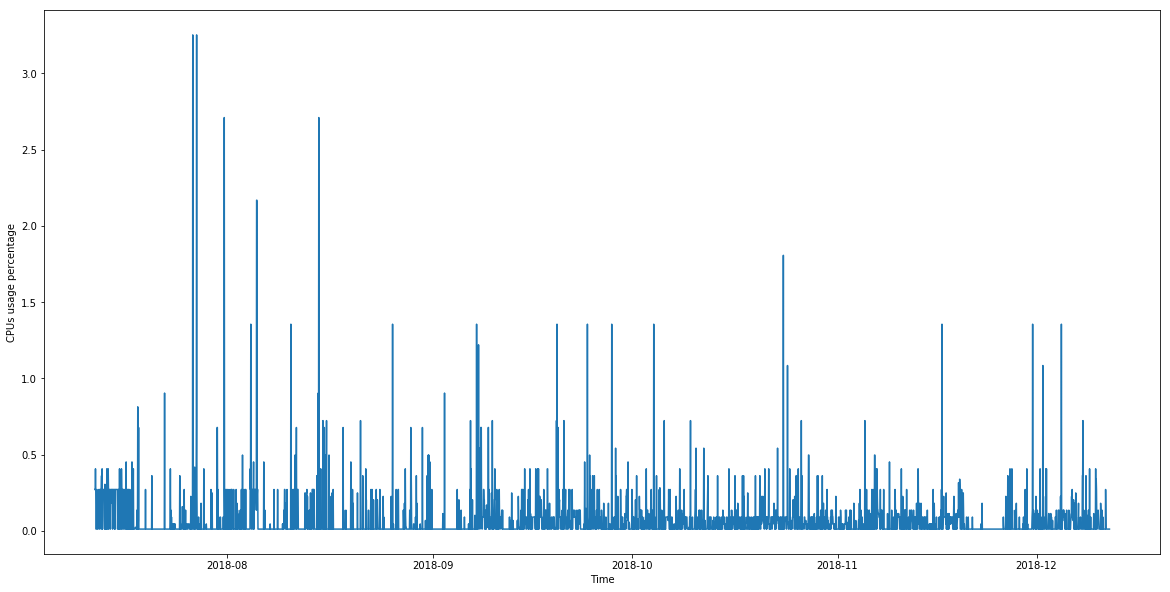

In [125]:
plt.figure(figsize=(20, 10))
plt.plot(x, df_utilization['cpus_being_used%'])
plt.ylabel("CPUs usage percentage")
plt.xlabel('Time')

Text(0,0.5,'Wait Time (Hours)')

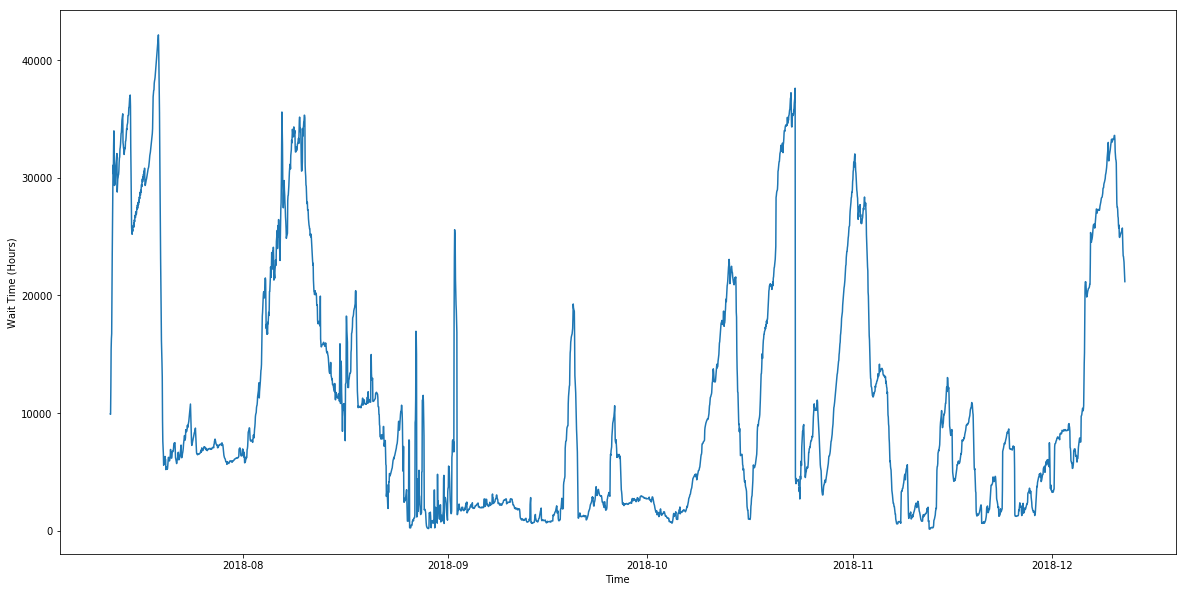

In [127]:
plt.figure(figsize=(20, 10))
plt.plot(x, df_utilization['wait_time'])
plt.xlabel("Time")
plt.ylabel('Wait Time (Hours)')

In [9]:
# df_utilization.to_csv('/scratch/shajisey/df_utilization.csv')

In [10]:
# df_utilization = pd.read_csv('df_utilization.csv')